In [ ]:
Ejercicio de Regresión lineal, Dataset Titanic

In [34]:
import pandas as pd

In [35]:
import numpy as np

In [36]:
import seaborn as sns

In [37]:
import matplotlib.pyplot as plt

In [38]:
from sklearn import metrics

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
Datos = pd.read_csv('./Titanic-Dataset.csv')

In [43]:
Datos.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [44]:
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

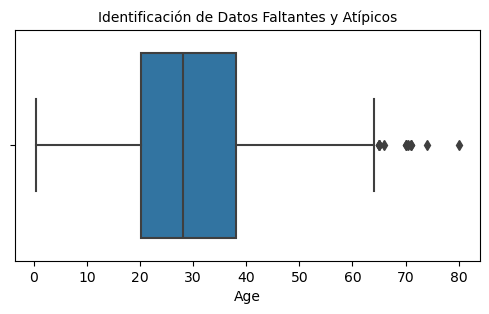

In [45]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [46]:
print("Cantidad de Registros con cero en Nivel de Pclass: ",Datos['Pclass'].isin([0]).sum())
print("Cantidad de Registros con cero en Fare: ",Datos['Fare'].isin([0]).sum())
print("Cantidad de Registros con cero en PassengerId: ",Datos['PassengerId'].isin([0]).sum())
print("Cantidad de Registros con cero en SibSp: ",Datos['SibSp'].isin([0]).sum())
print("Cantidad de Registros con cero en Parch: ",Datos['Parch'].isin([0]).sum())

Cantidad de Registros con cero en Nivel de Pclass:  0
Cantidad de Registros con cero en Fare:  15
Cantidad de Registros con cero en PassengerId:  0
Cantidad de Registros con cero en SibSp:  608
Cantidad de Registros con cero en Parch:  678


In [47]:
Datos['Pclass']=Datos['Pclass'].replace(0,Datos['Pclass'].mean())
Datos['Fare']=Datos['Fare'].replace(0,Datos['Fare'].mean())
Datos['PassengerId']=Datos['PassengerId'].replace(0,Datos['PassengerId'].mean())
Datos['SibSp']=Datos['SibSp'].replace(0,Datos['SibSp'].mean())
Datos['Parch']=Datos['Parch'].replace(0,Datos['Parch'].mean())

In [48]:
print("Cantidad de Registros con cero en Pclass: ",Datos['Pclass'].isin([0]).sum())
print("Cantidad de Registros con cero en Fare: ",Datos['Fare'].isin([0]).sum())
print("Cantidad de Registros con cero en PassengerId: ",Datos['PassengerId'].isin([0]).sum())
print("Cantidad de Registros con cero en SibSp: ",Datos['SibSp'].isin([0]).sum())
print("Cantidad de Registros con cero en Parch: ",Datos['Parch'].isin([0]).sum())

Cantidad de Registros con cero en Pclass:  0
Cantidad de Registros con cero en Fare:  0
Cantidad de Registros con cero en PassengerId:  0
Cantidad de Registros con cero en SibSp:  0
Cantidad de Registros con cero en Parch:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

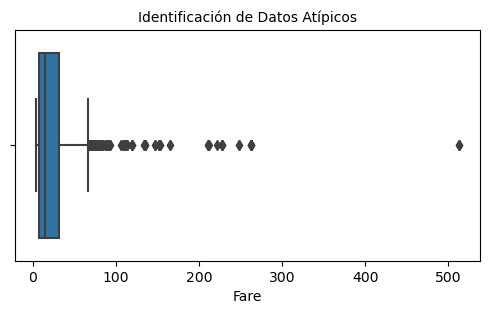

In [49]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Fare'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [50]:
nivel_minimo=20
nivel_maximo=800
Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 164


In [51]:
Datos=Datos[(Datos['Age']<nivel_maximo)&(Datos['Age']>nivel_minimo)]

In [52]:
Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [53]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  535 non-null    int64  
 1   Survived     535 non-null    int64  
 2   Pclass       535 non-null    int64  
 3   Name         535 non-null    object 
 4   Sex          535 non-null    object 
 5   Age          535 non-null    float64
 6   SibSp        535 non-null    float64
 7   Parch        535 non-null    float64
 8   Ticket       535 non-null    object 
 9   Fare         535 non-null    float64
 10  Cabin        156 non-null    object 
 11  Embarked     533 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 54.3+ KB


In [54]:
Datos['Survived'].value_counts()

Survived
0    327
1    208
Name: count, dtype: int64

In [55]:
Datos[['Survived']].head(40)

,Survived
0,0
1,1
2,1
3,1
4,0
6,0
8,1
11,1
13,0
15,1


In [56]:
X = Datos.drop('Survived',axis=1)
Y = Datos['Survived'] 


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [57]:
print (X_train)

     PassengerId  Pclass                                               Name  \
18            19       3  Vander Planke, Mrs. Julius (Emelia Maria Vande...   
263          264       1                              Harrison, Mr. William   
493          494       1                            Artagaveytia, Mr. Ramon   
659          660       1                         Newell, Mr. Arthur Webster   
594          595       2                            Chapman, Mr. John Henry   
..           ...     ...                                                ...   
695          696       2                         Chapman, Mr. Charles Henry   
620          621       3                                Yasbeck, Mr. Antoni   
551          552       2                        Sharp, Mr. Percival James R   
670          671       2  Brown, Mrs. Thomas William Solomon (Elizabeth ...   
520          521       1                              Perreault, Miss. Anne   

        Sex   Age     SibSp     Parch       Ticket 

In [58]:
print (Y_train)

18     0
263    0
493    0
659    0
594    0
      ..
695    0
620    0
551    0
670    1
520    1
Name: Survived, Length: 401, dtype: int64


In [63]:
X = Datos.drop('Survived',axis=1)
Y = Datos['Survived']
Prediccion = modelo_regresion.predict (X_test)


In [77]:
print (Y_test)

590    0
482    0
516    1
452    0
1      1
      ..
93     0
885    0
625    0
80     0
132    0
Name: Survived, Length: 134, dtype: int64


In [ ]:
print (Prediccion)

In [ ]:
print(classification_report(Y_test,Prediccion))

In [ ]:
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()